In [26]:
from __init__ import DATASET_PATH


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, PredictionErrorDisplay
from tqdm import tqdm

from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectPercentile
# https://jundongl.github.io/scikit-feature/algorithms.html
from skfeature.function.statistical_based import gini_index


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, r_regression, f_regression, mutual_info_regression, RFECV
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
gmean_scorer = make_scorer(geometric_mean_score)

import dtreeviz

from textwrap import wrap
from functools import reduce

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from main.components.scaler import Scaler
from main.components.imputer import Imputer
from main.components.one_hot_encoder import CustomOneHotEncoder
from main.constants import CATEGORICAL_ATTRIBUTES, CONTINUOUS_ATTRIBUTES, IGF, PROLACTIN, VITAMINE_D, PCO
from main.components.preprocessing_methods import get_continuous_attributes_except, get_categorical_attributes_except, explore_all_variations_of_preprocessing

from main.components.hyperparameter_tuning_methods import hyperparameter_tuning_general, hyperparameter_tuning_linear, compare_random_states, train_model, validate_model_classification
from main.components.feature_importance_methods import feature_selection_gini_index, feature_selection_chi2, plot_fancy_tree, plot_fancy_tree_smote, get_feature_importance_logistic_regressison, get_feature_importance_tree, get_feature_importance_rf, rename_importnace_col, merge_feature_importances, rank_importances, feature_selection_mutual_info_classification, recursive_feature_elimination, get_permutation_importance


from imblearn.pipeline import Pipeline as ImblearnPipeline
from imblearn.over_sampling import SMOTENC

import nest_asyncio
nest_asyncio.apply()

pd.set_option('display.max_columns', None) # enable showing all columns of the df
pd.set_option('display.max_rows', None)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


In [2]:
dataset_file_path = DATASET_PATH
df = pd.read_csv(dataset_file_path)
df.sample(5)

,"PCO 0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro",IGF-1 ng/ml (N: 100-311),proBNP,"AMH (ng/ml) *7,14=pmol/l",weight,height (cm),BMI,systolic BP (ciśnienie skurczowe),diastolic BP (ciśnienie rozskurczowe),Hypertension,Waist Circumference (WC),WC>88,Hip Circumference (HC),WHR (Waist/Hip ratio),"WHR>0,85 (WHO)","WHR>0,8 (NIDDK)",WHTR (Waist/Height Ratio),"WHTR>0,5","overweight/obesity 0-normal/low, 1-overweight, 2-obesity","irregular cycles (0-nie, 1-tak)","ovulation (0-brak, 1-obecna)","PCO ovary morfology in USG (0-brak, 1--obecna)","stromal hypertrophy in ovary (0-brak, 1-obecny)",acne,hirsutism,FG score (Ferriman-Gallway score - stopień androgenizacji),hyperandrogenism,elevated DHT,hypothyroidism,Volume of the thyroid Right Lobe,Volume of the thyroid Left Lobe,thyroid volume,"nodules 0-lack, 1-RL, 2-LL, 3-both",chronic thyroiditis,Vole of the Right Ovary,Volume of the Left Ovary,ovaries volume - total,follicules >12,WBC x10^3/ul,neutrophil x10^3/ul,lymphocytes x10^3/ul,monocytes x10^3/ul,eosinocytes x10^3/ul,basophils x10^3/ul,% neutrophil,% lymphocytes,% monocytes,%eosinocytes,%basophils,RBC x10^6ul,Hemoglobin [g/dl],hematocrit [%],HTC/Hb,MCV fl,MCH pg,MCHC g/dl,RDW-CV %,PLT x10^3/ul,PDW fl,MPV fl,P-LCR %,PLT/WBC,MPV/PLT,PLR,limf/mono,NLR (stosunek neutrofili do limfocytów),L/WCC (leukocyty do całkowitej liczby krwinek białych),eos/leukocyty,sodium mmol/l,potassium mmol/l,calcium mg/dl,phosphorus mg/dl,creatinine mg/dl,CRP mg/l,ALT U/l,AST U/l,Bilirubin mg/dl,CHOL mmol/l,CHOL>200,HDL mmol/l,HDL<50,LDL mmol/l,LDL>135,TG mmol/l,Atherogenic index (AI) (LDL-C/HDL-C),coronary risk index (CRI) (TG/HDL-C),VAI - Visceral adiposity index,BAI - Body adiposity index,LAP INDEX - Lipid accumulation product index,TyG Index - Trigliceride-glucose index,AIP -Atherogenic index of plasma,UIBC ug/dl,ferrum ug/dl,TIBC,TSAT,ferritin ng/ml,glucose 0 mg/dl,glucose 120 mg/dl,insulin 0 uU/ml,Insulin 120 uU/ml,HOMA,Matsuda,"QUICKI (N<0,357)",TSH mIU/L,FT3 pmol/l,FT4 pmol/l,Anty-TPO IU/ml,Anty-TG IU/ml,FSH mlU/ml,LH,LH/FSH,prolactin,DHEA-S ug/dl,testosterone nmol/l,T (ng/ml),T/SHBG,E(pg/ml)/T(ng/ml)/,Parathormone pg/ml,cortisol nmol/l 8:00,cortisol nmol/l 18:00,Estradiol pg/ml,SHBG nmol/l,SHBG>110,FTI (free testosterone index),ACTH pg/ml,HbA1c %,vitamin 25-OH D ng/ml,Androstendione ng/ml,17-OH-progesterone ng/ml,Dihydrotestosterone pg/ml (N<368),Testosterone/DHT,T/A (testosterone/androstendione),age
343,1,197.0,86.57,6.800000,53.5,171.0,18.296228,130.0,80.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.165,3.000,7.165,0.0,0.0,12.8200,9.830,22.6500,1.0,4.88,2.53,1.79,0.43,0.08,0.05,51.9,36.7,8.8,1.6,1.0,4.00,12.0,34.1,2.841667,85.3,30.0,35.2,12.0,239.0,13.7,11.0,33.0,48.975410,0.046025,133.519553,4.162791,1.413408,0.366803,0.016393,144.0,3.80,9.29,3.83,0.70,0.3,11.0,17.0,0.32,4.34448,0.0,1.78434,0.0,2.301540,0.0,0.59837,1.289855,0.768116,NaN,NaN,NaN,4.212320,-0.114573,350.0,54.0,404.0,13.0,9.0,86.0,97.0,3.50,21.16,0.743210,17.16,0.403459,3.04,5.02,21.96,17.0,14.0,5.2,10.5,2.019231,472.0,288.0,1.2,0.345821,0.019481,60.725000,41.64,611.0,174.0,21.0,61.6,0.0,1.98,52.18,4.2,28.0,4.66,2.90,314.0,0.003822,0.257511,26.0
330,1,305.0,NaN,NaN,94.0,165.0,34.527089,104.0,74.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,0.0,0.0,2.0,1.0,0.0,1.0,2.457,1.155,3.612,0.0,1.0,NaN,NaN,NaN,NaN,8.82,6.03,2.09,0.59,0.07,0.04,68.3,23.7,6.7,0.8,0.5,4.48,13.3,39.3,2.954887,87.7,29.7,33.8,12.5,247.0,10.7,12.8,29.8,28.004535,0.051822,118.181818,3.542373,2.885167,0.236961,0.007937,143.0,4.09,9.18,3.48,0.65,3.2,11.0,14.0,0.39,2.99976,0.0,1.29300,0.0,1.228350,0.0,1.06126,0.950000,1.880000,NaN,NaN,NaN,4.510316,0.274158,NaN,NaN,NaN,NaN,23.0,88.0,106.0,13.40,53.91,2.911605,5.09,0.325565,2.00,4.63,18.61,10.0,10.0,2.9,6.3,2.172414,237.0,190.0,2.2,0.634006,0.029451,255.518180,NaN,384.0,213.0,162.0,74.7,0.0,3.00,13.95,NaN,NaN,4.36,3.04,296.0,0.007432,0.504587,26.0
316,1,251.0,34.67,7.617647,60.0,172.0,20.281233,96.0,82.0,0.0,67.0,0.0

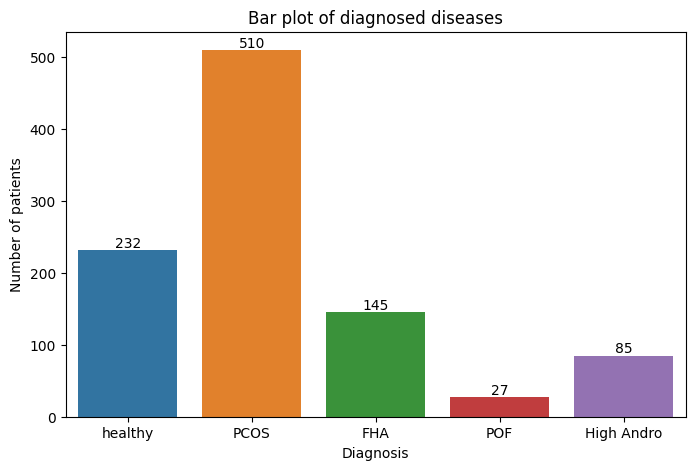

In [3]:
labels = {0: 'healthy', 1: 'PCOS', 2: 'FHA', 3: 'POF', 4: 'High Andro'}
df['PCO_label'] = df[PCO].map(labels)

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='PCO_label', order=['healthy', 'PCOS', 'FHA', 'POF', 'High Andro'], hue='PCO_label')

for i, p in enumerate(ax.patches):
    ax.bar_label(ax.containers[i])

plt.xlabel('Diagnosis')
plt.ylabel('Number of patients')
plt.title('Bar plot of diagnosed diseases')
plt.show()

(999, 134)


<Axes: >

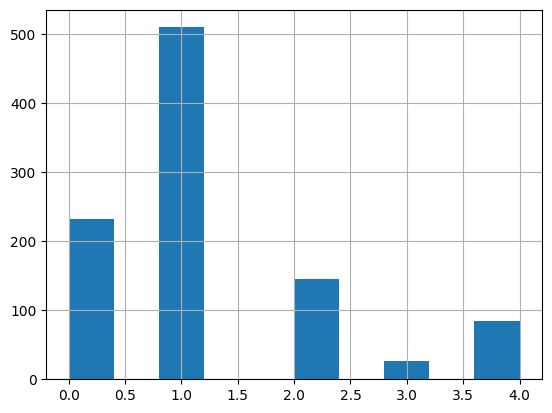

In [4]:
print(df.shape)
df[PCO].hist()

# Model selection for PCO

In [5]:
CLASS_NAMES = ['healthy', 'PCOS', 'FHA', 'POF', 'High Andro']

### Remove the `POF` class

In [5]:
# df.loc[df[PCO] == 3, PCO] = np.nan

# #  change all 4s to 3s for the need of the visualisation algorithm
# df[PCO] = np.where(df[PCO] == 4, 3, df[PCO])


# CLASS_NAMES = ['healthy', 'PCOS', 'FHA', 'High Andro']

In [6]:
df_cleaned = df.dropna(subset=[PCO])

X, y = df_cleaned.drop(columns=[PCO]), df_cleaned[PCO]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Best preprocessing

In [8]:
continuous_preprocessor_tree = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

continuous_preprocessor = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
categorical_preprocessor = Pipeline([('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')), ('one_hot_encoder', OneHotEncoder(handle_unknown='error', drop='if_binary'))])


preprocessor = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ('num', continuous_preprocessor, CONTINUOUS_ATTRIBUTES),
        ('cat', categorical_preprocessor, get_categorical_attributes_except(PCO))
    ])

In [29]:
def explore_all_variations_of_preprocessing_claffisication(X_train, y_train, target_attribute, models, continuous_preprocessings, categorical_preprocessings, scoring_metric='gmean'):
    scores_df = pd.DataFrame(columns=['continuous_preprocessing', 'categorical_pteprocessing', 'model', str(scoring_metric)])

    i = 1
    total_iterations = len(continuous_preprocessings) * len(categorical_preprocessings) * len(models)

    for continuous_preprocessor_name, continuous_preprocessor in continuous_preprocessings.items():
        for categorical_preprocessor_name, categorical_preprocessor in categorical_preprocessings.items():
            for model in models:
                preprocessor = ColumnTransformer(
                    verbose_feature_names_out=False,
                    transformers=[
                        ('num', continuous_preprocessor, get_continuous_attributes_except(target_attribute)),
                        ('cat', categorical_preprocessor, get_categorical_attributes_except(target_attribute))
                    ])

                pipeline = Pipeline([('preprocessor', preprocessor), ('model', model)])
                pipeline = get_smote_pipeline(model, target_attribute, get_continuous_attributes_except(target_attribute),  get_categorical_attributes_except(target_attribute), continuous_preprocessor, categorical_preprocessor)

                cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
                scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=scoring_metric, n_jobs=-1)
                
                scores_df.loc[len(scores_df)] = [continuous_preprocessor_name, categorical_preprocessor_name, str(model), abs(scores.mean())]
                print(f'{i}/{total_iterations}', str(model), continuous_preprocessor_name, categorical_preprocessor_name, scores, abs(scores.mean()))
                i += 1

    return scores_df


def get_smote_pipeline(model, target_attribute, continuous_attributes, categorical_attributes, continous_imputer_pipeline, categorical_imputer_pipeline):
    imputer_transformer = ColumnTransformer(
        verbose_feature_names_out=False,
        transformers=[
            ('num', continous_imputer_pipeline, continuous_attributes),
            ('cat', categorical_imputer_pipeline, categorical_attributes)
        ])
    imputer_transformer.set_output(transform='pandas')

    smt = SMOTENC(random_state=42, categorical_features=categorical_attributes)

    categorical_one_hot_encoder = Pipeline([
        ('one_hot_encoder', OneHotEncoder(handle_unknown='error', drop='if_binary', sparse_output=False)),
        ])

    one_hot_encoding_transformer = ColumnTransformer(
            verbose_feature_names_out=False,
            remainder='passthrough',
            transformers=[
                ('cat', categorical_one_hot_encoder, categorical_attributes),
            ]).set_output(transform='pandas')
    

    model_pipeline = ImblearnPipeline([
                ('imputing', imputer_transformer),
                ('smt', smt),
                ('preprocessor', one_hot_encoding_transformer),
                ('model', model),
                ])

    return model_pipeline




In [34]:

from sklearn.discriminant_analysis import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler


models = [
        LogisticRegression(),
        KNeighborsClassifier(),
        ]


continuous_preprocessings = {
    # 'Min Max': Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=10))]),
    # 'Standard Scaler': Pipeline([('scaler', StandardScaler()), ('imputer', KNNImputer(n_neighbors=10))]),
    # 'Power Transformer': Pipeline([('scaler', PowerTransformer()), ('imputer', KNNImputer(n_neighbors=10))]),
    
    'Min Max': Pipeline([('scaler', MinMaxScaler()), ('imputer', IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10, n_jobs=-1), max_iter=10, initial_strategy='median'))]),
    'Standard Scaler': Pipeline([('scaler', StandardScaler()), ('imputer', IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10, n_jobs=-1), max_iter=10, initial_strategy='median'))]),
    'Power Transformer': Pipeline([('scaler', PowerTransformer()), ('imputer', IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10, n_jobs=-1), max_iter=10, initial_strategy='median'))]),
}

categorical_preprocessings = {
    'ii_imputer': Pipeline([('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=10, initial_strategy='most_frequent'))]),
}



scores_df = explore_all_variations_of_preprocessing_claffisication(X_train, y_train, PCO, models, continuous_preprocessings, categorical_preprocessings, scoring_metric=gmean_scorer)
scores_df.sort_values(by="make_scorer(geometric_mean_score, response_method='predict')", ascending=False)

1/6 LogisticRegression() Min Max ii_imputer [0.52256671 0.50243236 0.58888273 0.50064789 0.         0.45918372
 0.         0.67731236 0.58708412 0.         0.55167284 0.
 0.51964509 0.45824012 0.51123011] 0.39192653719638937
2/6 KNeighborsClassifier() Min Max ii_imputer [0.         0.         0.49784148 0.         0.         0.44607707
 0.57491393 0.60029761 0.         0.         0.47542793 0.
 0.58832316 0.39572213 0.        ] 0.23857355378602743
3/6 LogisticRegression() Standard Scaler ii_imputer [0.53476403 0.5723528  0.55185324 0.47760777 0.         0.48859709
 0.         0.64679398 0.52371045 0.37716495 0.         0.
 0.58013619 0.52769585 0.47276788] 0.3835629483229356
4/6 KNeighborsClassifier() Standard Scaler ii_imputer [0.35400063 0.36875143 0.45418308 0.39081261 0.         0.34674114
 0.         0.470239   0.45216998 0.29730716 0.         0.
 0.44087    0.38085877 0.33618275] 0.2861411041720234
5/6 LogisticRegression() Power Transformer ii_imputer [0.53108833 0.54052015 0.533

,continuous_preprocessing,categorical_pteprocessing,model,"make_scorer(geometric_mean_score, response_method='predict')"
0,Min Max,ii_imputer,LogisticRegression(),0.391927
4,Power Transformer,ii_imputer,LogisticRegression(),0.384611
2,Standard Scaler,ii_imputer,LogisticRegression(),0.383563
3,Standard Scaler,ii_imputer,KNeighborsClassifier(),0.286141
5,Power Transformer,ii_imputer,KNeighborsClassifier(),0.262176
1,Min Max,ii_imputer,KNeighborsClassifier(),0.238574


In [35]:
df.loc[df[PCO] == 3, PCO] = np.nan

#  change all 4s to 3s for the need of the visualisation algorithm
df[PCO] = np.where(df[PCO] == 4, 3, df[PCO])


CLASS_NAMES = ['healthy', 'PCOS', 'FHA', 'High Andro']


df_cleaned = df.dropna(subset=[PCO])

X, y = df_cleaned.drop(columns=[PCO]), df_cleaned[PCO]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:

from sklearn.discriminant_analysis import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler


models = [
        LogisticRegression(),
        KNeighborsClassifier(),
        ]


continuous_preprocessings = {
    # 'Min Max': Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=10))]),
    # 'Standard Scaler': Pipeline([('scaler', StandardScaler()), ('imputer', KNNImputer(n_neighbors=10))]),
    # 'Power Transformer': Pipeline([('scaler', PowerTransformer()), ('imputer', KNNImputer(n_neighbors=10))]),
    
    'Min Max': Pipeline([('scaler', MinMaxScaler()), ('imputer', IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10, n_jobs=-1), max_iter=10, initial_strategy='median'))]),
    'Standard Scaler': Pipeline([('scaler', StandardScaler()), ('imputer', IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10, n_jobs=-1), max_iter=10, initial_strategy='median'))]),
    'Power Transformer': Pipeline([('scaler', PowerTransformer()), ('imputer', IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10, n_jobs=-1), max_iter=10, initial_strategy='median'))]),
}

categorical_preprocessings = {
    'ii_imputer': Pipeline([('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=10, initial_strategy='most_frequent'))]),
}



scores_df = explore_all_variations_of_preprocessing_claffisication(X_train, y_train, PCO, models, continuous_preprocessings, categorical_preprocessings, scoring_metric=gmean_scorer)
scores_df.sort_values(by="make_scorer(geometric_mean_score, response_method='predict')", ascending=False)

1/6 LogisticRegression() Min Max ii_imputer [0.56743215 0.60580423 0.59847401 0.70009043 0.54763251 0.5930293
 0.68289755 0.60200435 0.58536865 0.50909711 0.55971012 0.61092883
 0.54198984 0.6677323  0.7727707 ] 0.60966413846666
2/6 KNeighborsClassifier() Min Max ii_imputer [0.58056851 0.60387093 0.53960285 0.60288177 0.51512789 0.50384899
 0.5898669  0.55395764 0.5160043  0.4379019  0.46487574 0.50964447
 0.41182322 0.51089397 0.59274505] 0.528907609880144
3/6 LogisticRegression() Standard Scaler ii_imputer [0.56462701 0.51805653 0.57205613 0.63788452 0.         0.51001504
 0.63631484 0.5276035  0.56468833 0.53724646 0.50547768 0.56026663
 0.49664757 0.63384435 0.65578421] 0.528034187531422
4/6 KNeighborsClassifier() Standard Scaler ii_imputer [0.3492671  0.4427046  0.36157272 0.45715333 0.43527714 0.43927916
 0.4005616  0.40732889 0.3853374  0.3675556  0.3863562  0.45565126
 0.34392046 0.45276946 0.45079187] 0.40903511914685947
5/6 LogisticRegression() Power Transformer ii_imputer [0

,continuous_preprocessing,categorical_pteprocessing,model,"make_scorer(geometric_mean_score, response_method='predict')"
0,Min Max,ii_imputer,LogisticRegression(),0.609664
4,Power Transformer,ii_imputer,LogisticRegression(),0.539757
1,Min Max,ii_imputer,KNeighborsClassifier(),0.528908
2,Standard Scaler,ii_imputer,LogisticRegression(),0.528034
3,Standard Scaler,ii_imputer,KNeighborsClassifier(),0.409035
5,Power Transformer,ii_imputer,KNeighborsClassifier(),0.346843


## Hyperparameter tuning

### Decision Tree

In [ ]:
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [4, 5, 6],
    'model__min_samples_leaf': [3, 4, 5],
    'model__class_weight': [None],
}

tree_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

In [11]:
model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter='random')

tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
tuned_df.abs.sort_values(by='cv_score', ascending=False).head(5)

100%|██████████| 99/99 [15:19<00:00,  9.28s/it]


,cv_score
18,-0.493617
64,-0.504952
75,-0.507124
45,-0.509694
55,-0.509711


### Logistic Regression

Fitting 15 folds for each of 8 candidates, totalling 120 fits
Best parameters: {'model__C': 2}
Best score (f1_weighted): 0.715119149273523


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


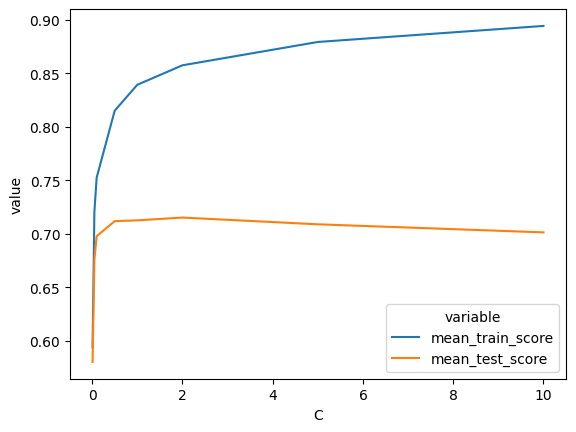

,C,mean_train_score,mean_test_score
0,0.01,0.593938,0.580321
1,0.05,0.720085,0.675474
2,0.1,0.752316,0.697647
3,0.5,0.814890,0.711791
4,1,0.839098,0.712511
5,2,0.857298,0.715119
6,5,0.879089,0.708827
7,10,0.894077,0.701297


In [12]:
model_lr = LogisticRegression(multi_class='multinomial', max_iter=100000, n_jobs=-1)

param_grid_lr = {
    'model__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
}

lr_h_scores = hyperparameter_tuning_linear(X_train, y_train, PCO, model_lr, continuous_preprocessor, categorical_preprocessor, param_grid_lr, main_parameter='C', scoring_metric='f1_weighted')
lr_h_scores

Selected C=0.5

### Random Forest

In [72]:
model_rf = RandomForestClassifier(n_jobs=-1)

param_grid_rf = {
    'model__criterion': ['gini'],
    'model__class_weight': ['balanced_subsample'],
    'model__n_estimators': [200],
    'model__max_features': ['sqrt'],
    'model__max_depth': [None],
    'model__min_samples_split': [3, 4, 5],
    'model__min_samples_leaf': [5, 6, 7],
}

rf_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_rf, continuous_preprocessor_tree, categorical_preprocessor, param_grid_rf, scoring_metric='f1_weighted')
rf_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 9 candidates, totalling 135 fits
Best parameters: {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best score (f1_weighted): 0.7826160815395791


,params,mean_train_score,mean_test_score
8,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}",0.913822,0.782616
4,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 4, 'model__n_estimators': 200}",0.928839,0.780565
2,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}",0.948672,0.780479
3,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 3, 'model__n_estimators': 200}",0.930861,0.778460
1,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 4, 'model__n_estimators': 200}",0.948119,0.778261
5,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 5, 'model__n_estimators': 200}",0.929055,0.778234
6,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 3, 'model__n_estimators': 200}",0.915132,0.777261
0,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 3, 'model__n_estimators': 200}",0.947720,0.775780
7,"{'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 4, 'model__n_estimators': 200}",0.912644,0.774311


In [12]:
model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
tuned_df.abs().sort_values(by='cv_score', ascending=False).head(5)

100%|██████████| 99/99 [19:35<00:00, 11.88s/it]


,cv_score
25,-0.39638
56,-0.398133
70,-0.399275
94,-0.402765
98,-0.405842


### SVM

In [ ]:
model_svc = SVC(n_jobs=-1, decision_function_shape='ovo')

param_grid_svc = {
    'model__kernel': ['linear', 'rbf', 'sigmoid'],
    'model__C': [0.1, 1, 10, 100],
    'model__gamma': [0.1, 1, 10],
    'model__epsilon': [0.1, 0.2, 0.3],
}

svc_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_svc, continuous_preprocessor, categorical_preprocessor, param_grid_svc, scoring_metric='f1_weighted')
svc_h_scores.sort_values(by='mean_test_score', ascending=False)

## Best models

### DecisionTree

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


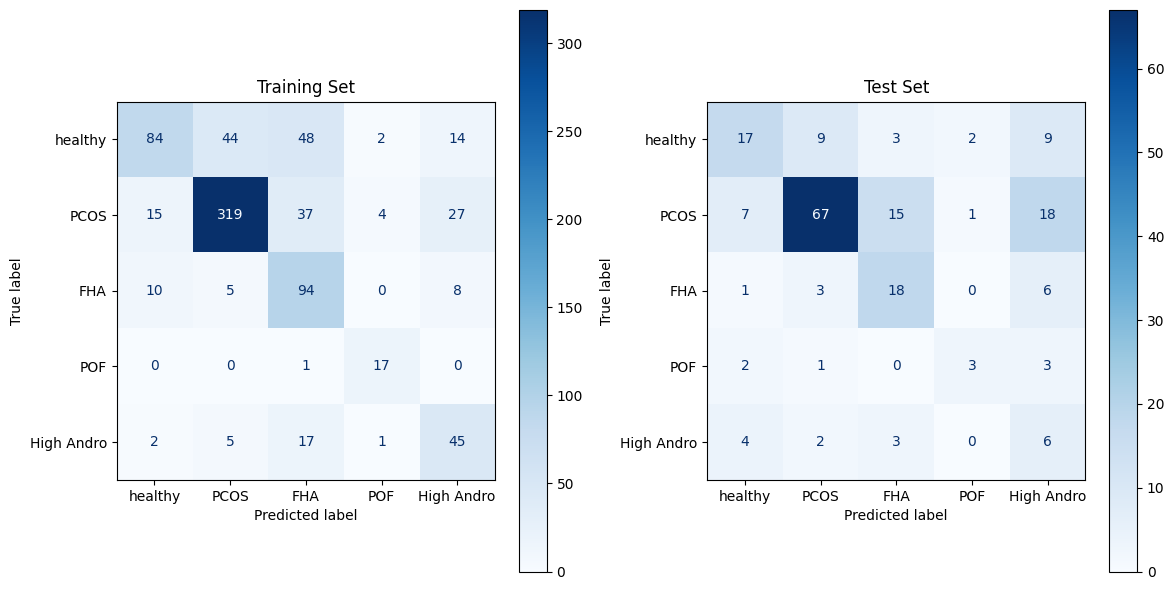

Training set
              precision    recall  f1-score   support

     healthy       0.76      0.44      0.55       192
        PCOS       0.86      0.79      0.82       402
         FHA       0.48      0.80      0.60       117
         POF       0.71      0.94      0.81        18
  High Andro       0.48      0.64      0.55        70

    accuracy                           0.70       799
   macro avg       0.66      0.72      0.67       799
weighted avg       0.74      0.70      0.70       799

Test set
              precision    recall  f1-score   support

     healthy       0.55      0.42      0.48        40
        PCOS       0.82      0.62      0.71       108
         FHA       0.46      0.64      0.54        28
         POF       0.50      0.33      0.40         9
  High Andro       0.14      0.40      0.21        15

    accuracy                           0.56       200
   macro avg       0.49      0.48      0.47       200
weighted avg       0.65      0.56      0.59       200



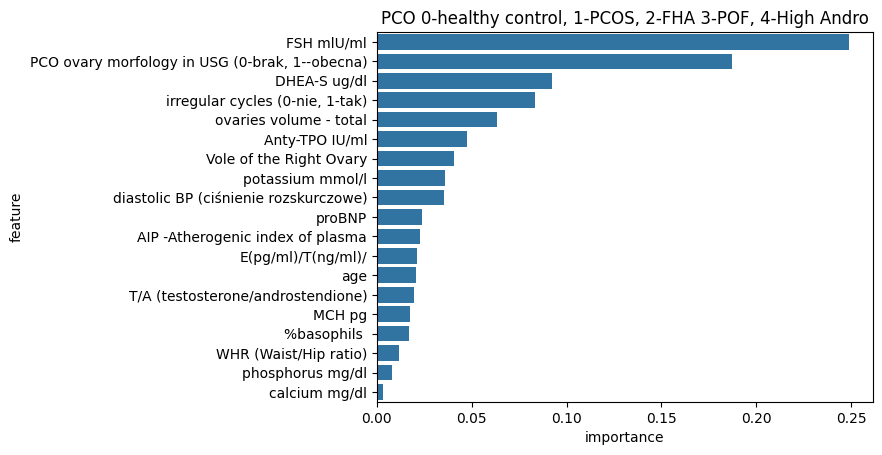

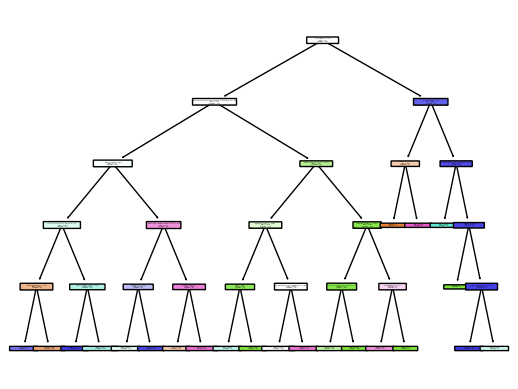

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


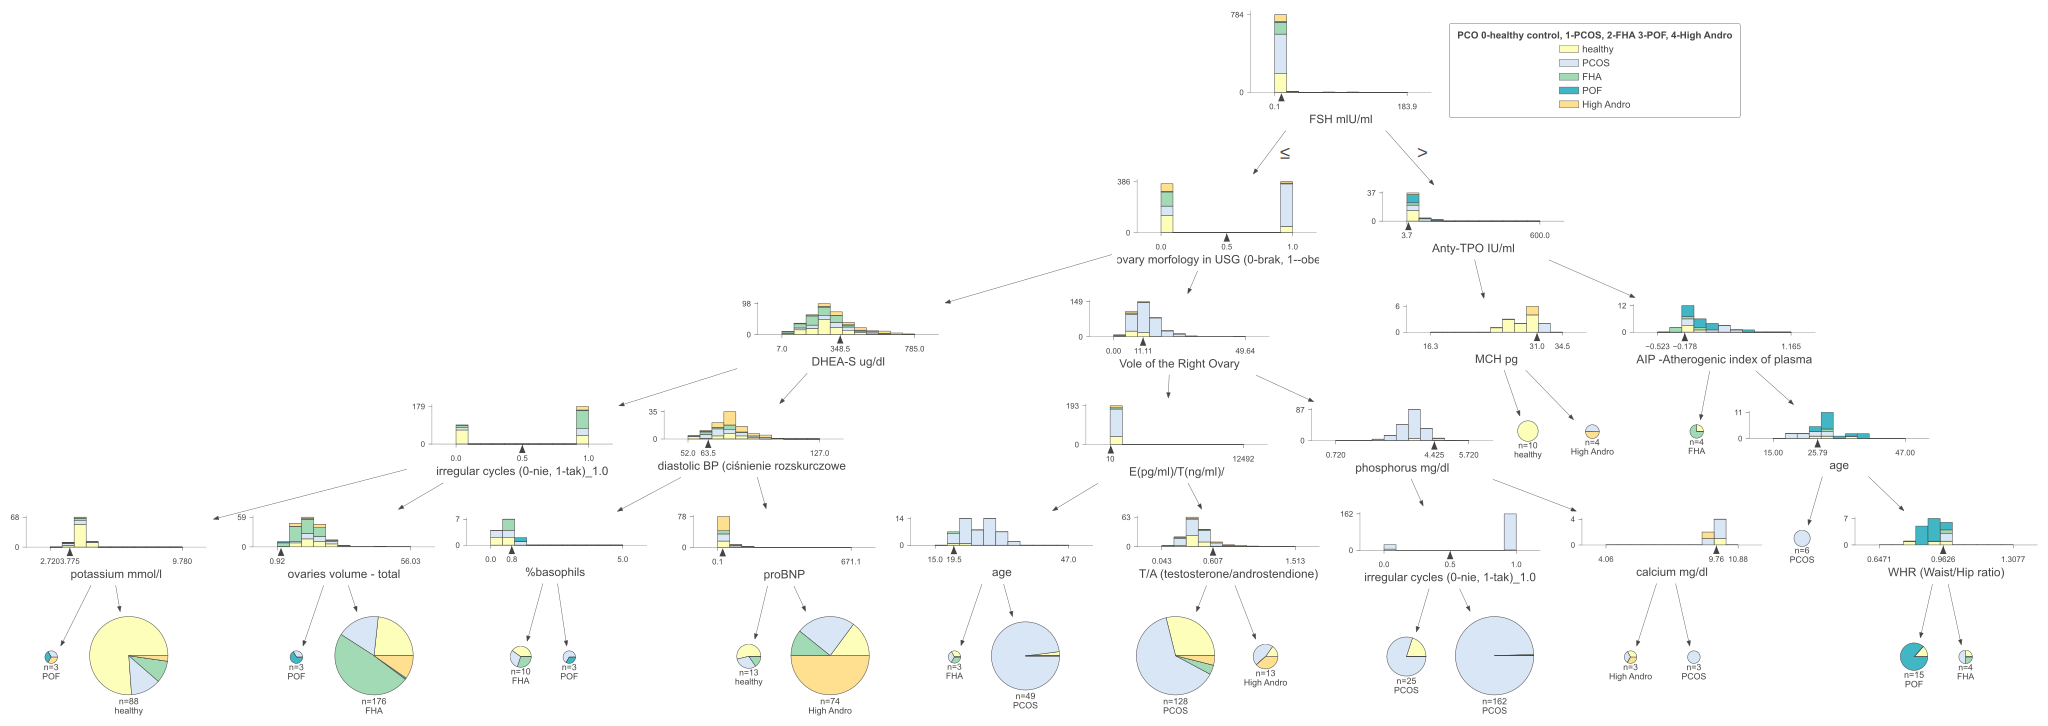

In [10]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=3, min_samples_split=6, class_weight='balanced', splitter='best')

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

plot_fancy_tree(pipeline_tree, X_train, y_train, PCO, CLASS_NAMES)

### RandomForest

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


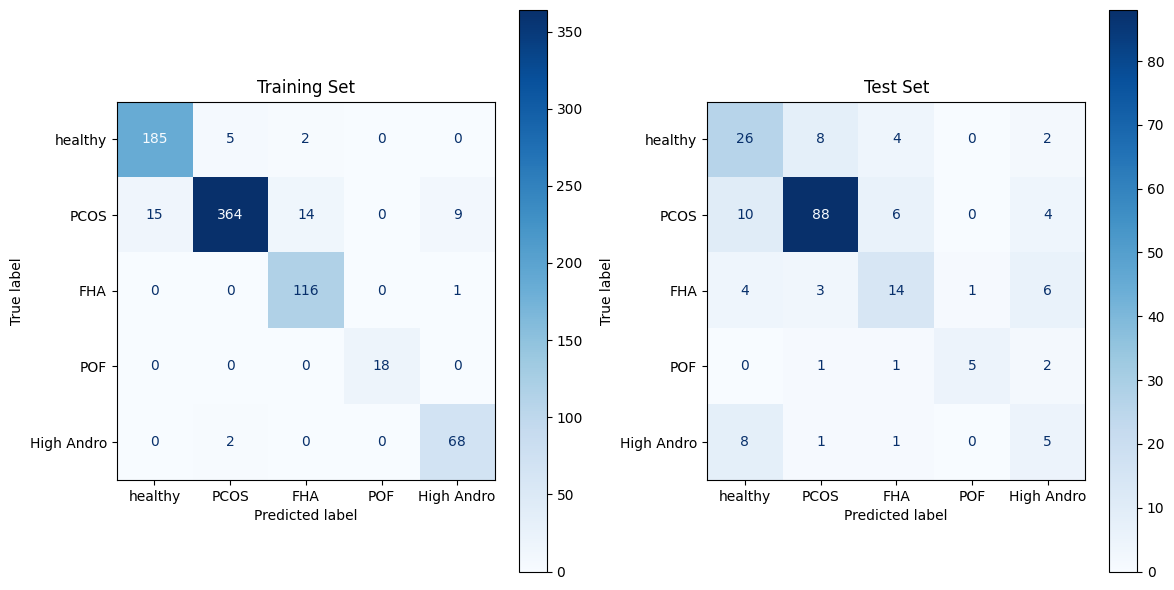

Training set
              precision    recall  f1-score   support

     healthy       0.93      0.96      0.94       192
        PCOS       0.98      0.91      0.94       402
         FHA       0.88      0.99      0.93       117
         POF       1.00      1.00      1.00        18
  High Andro       0.87      0.97      0.92        70

    accuracy                           0.94       799
   macro avg       0.93      0.97      0.95       799
weighted avg       0.94      0.94      0.94       799

Test set
              precision    recall  f1-score   support

     healthy       0.54      0.65      0.59        40
        PCOS       0.87      0.81      0.84       108
         FHA       0.54      0.50      0.52        28
         POF       0.83      0.56      0.67         9
  High Andro       0.26      0.33      0.29        15

    accuracy                           0.69       200
   macro avg       0.61      0.57      0.58       200
weighted avg       0.71      0.69      0.70       200



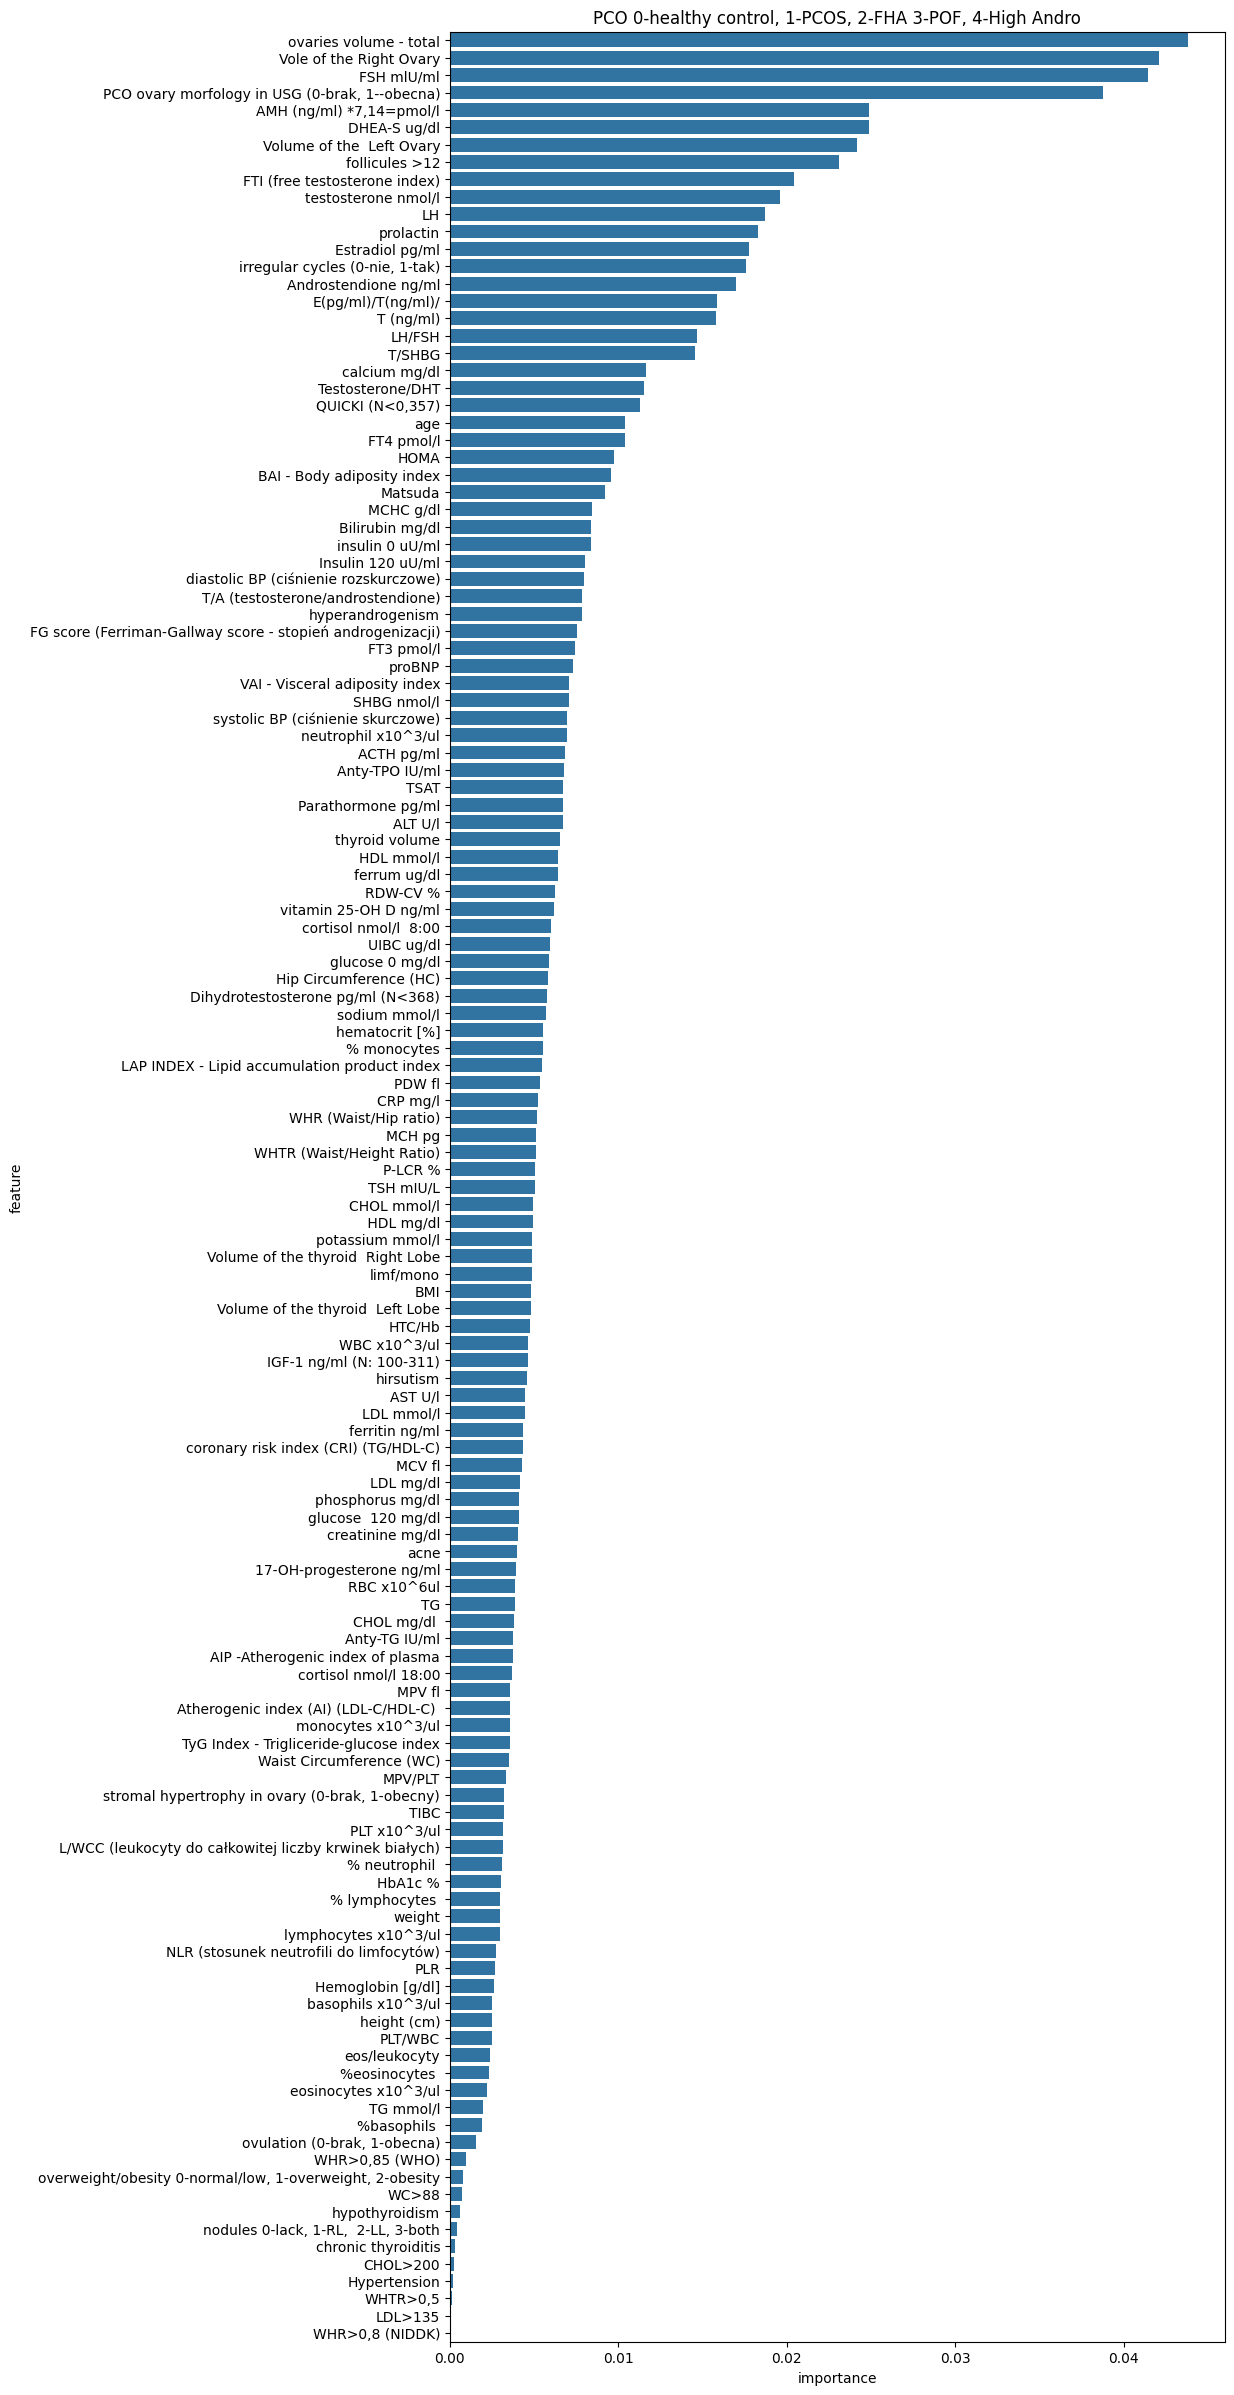

In [22]:
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)

### Logistic Regression

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


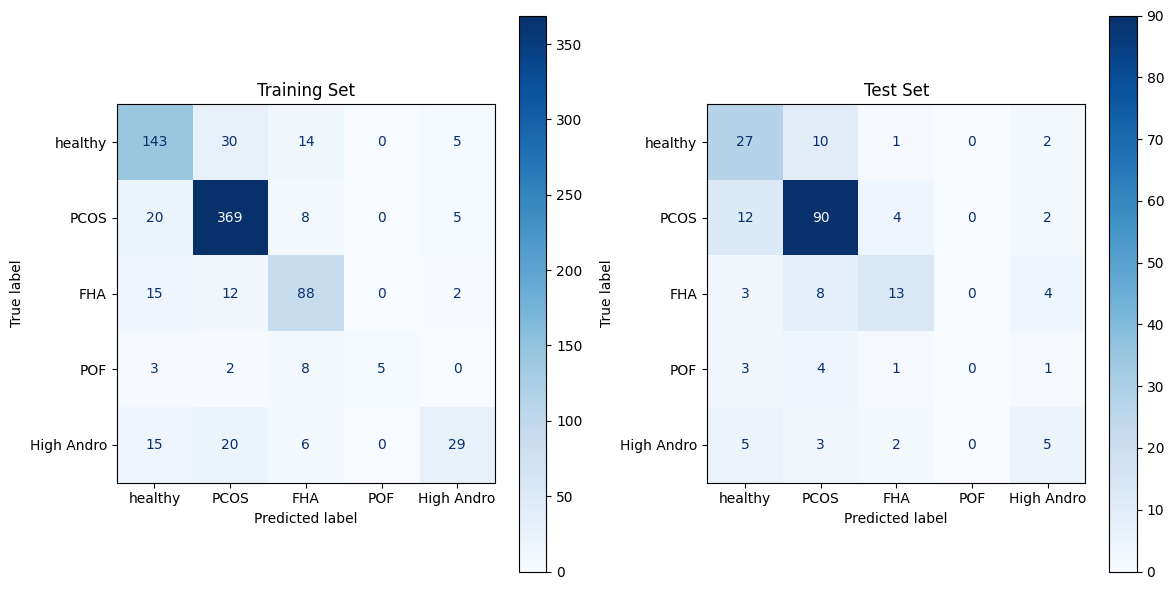

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Training set
              precision    recall  f1-score   support

     healthy       0.73      0.74      0.74       192
        PCOS       0.85      0.92      0.88       402
         FHA       0.71      0.75      0.73       117
         POF       1.00      0.28      0.43        18
  High Andro       0.71      0.41      0.52        70

    accuracy                           0.79       799
   macro avg       0.80      0.62      0.66       799
weighted avg       0.79      0.79      0.78       799

Test set
              precision    recall  f1-score   support

     healthy       0.54      0.68      0.60        40
        PCOS       0.78      0.83      0.81       108
         FHA       0.62      0.46      0.53        28
         POF       0.00      0.00      0.00         9
  High Andro       0.36      0.33      0.34        15

    accuracy                           0.68       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.64      0.68      0.66       200



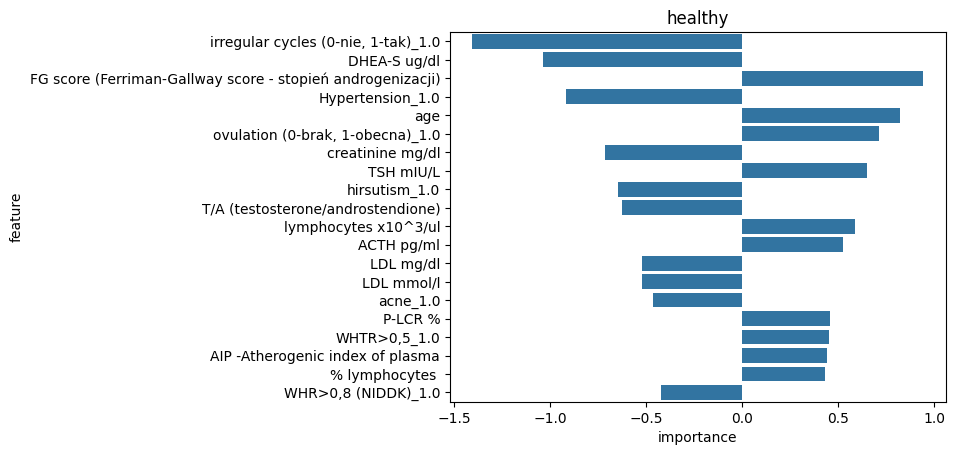

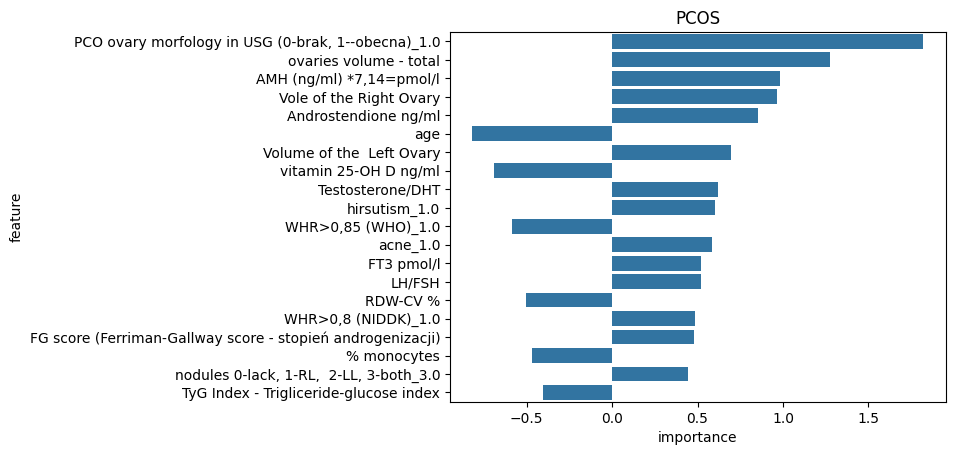

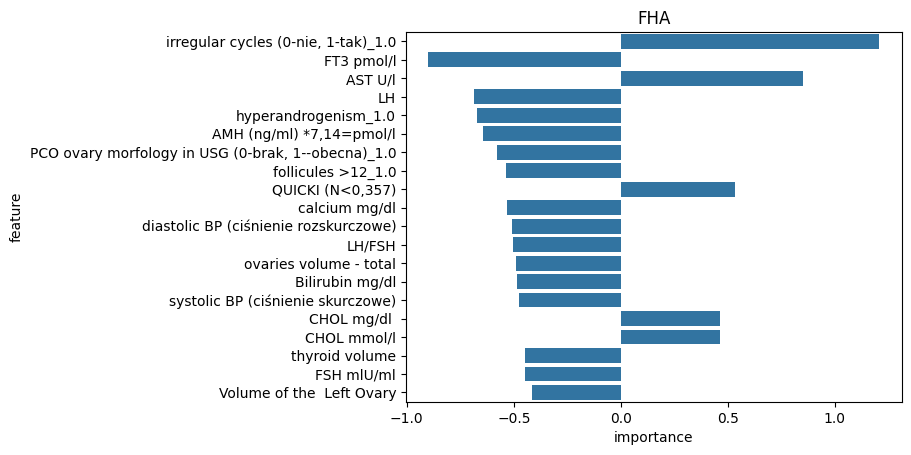

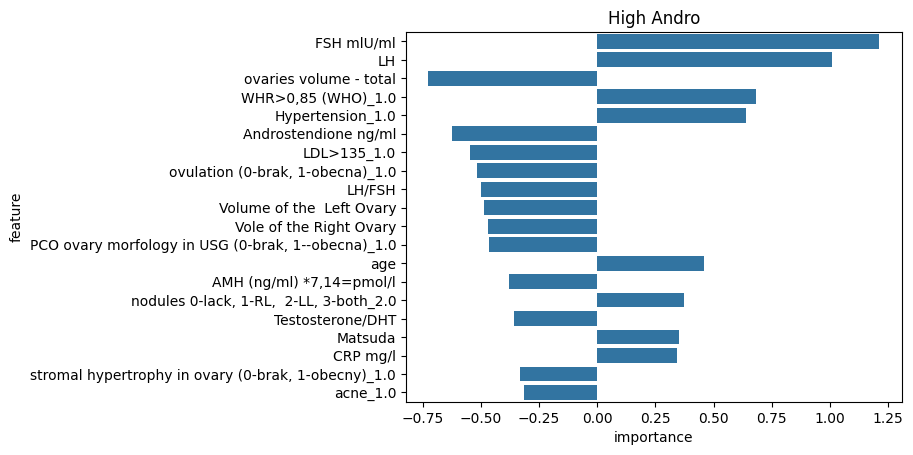

IndexError: list index out of range

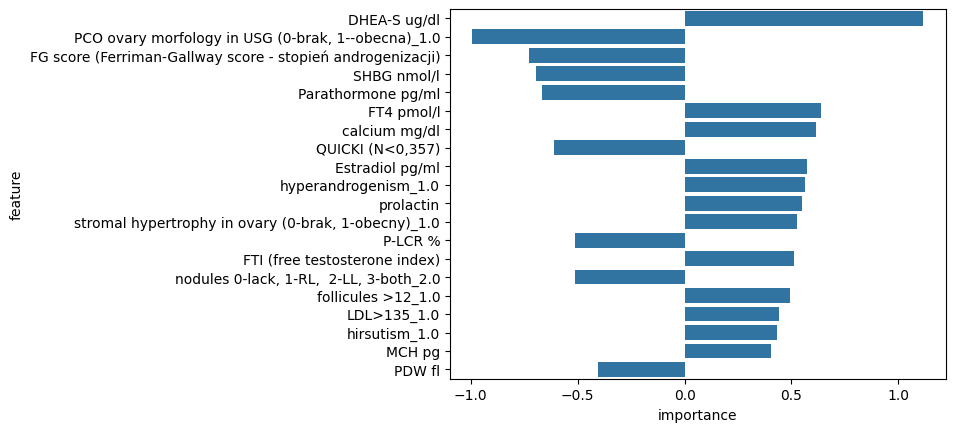

In [25]:
model_lr = LogisticRegression(C=0.5, multi_class='multinomial', max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

## Feature importance

In [12]:
selected_features_map = {}

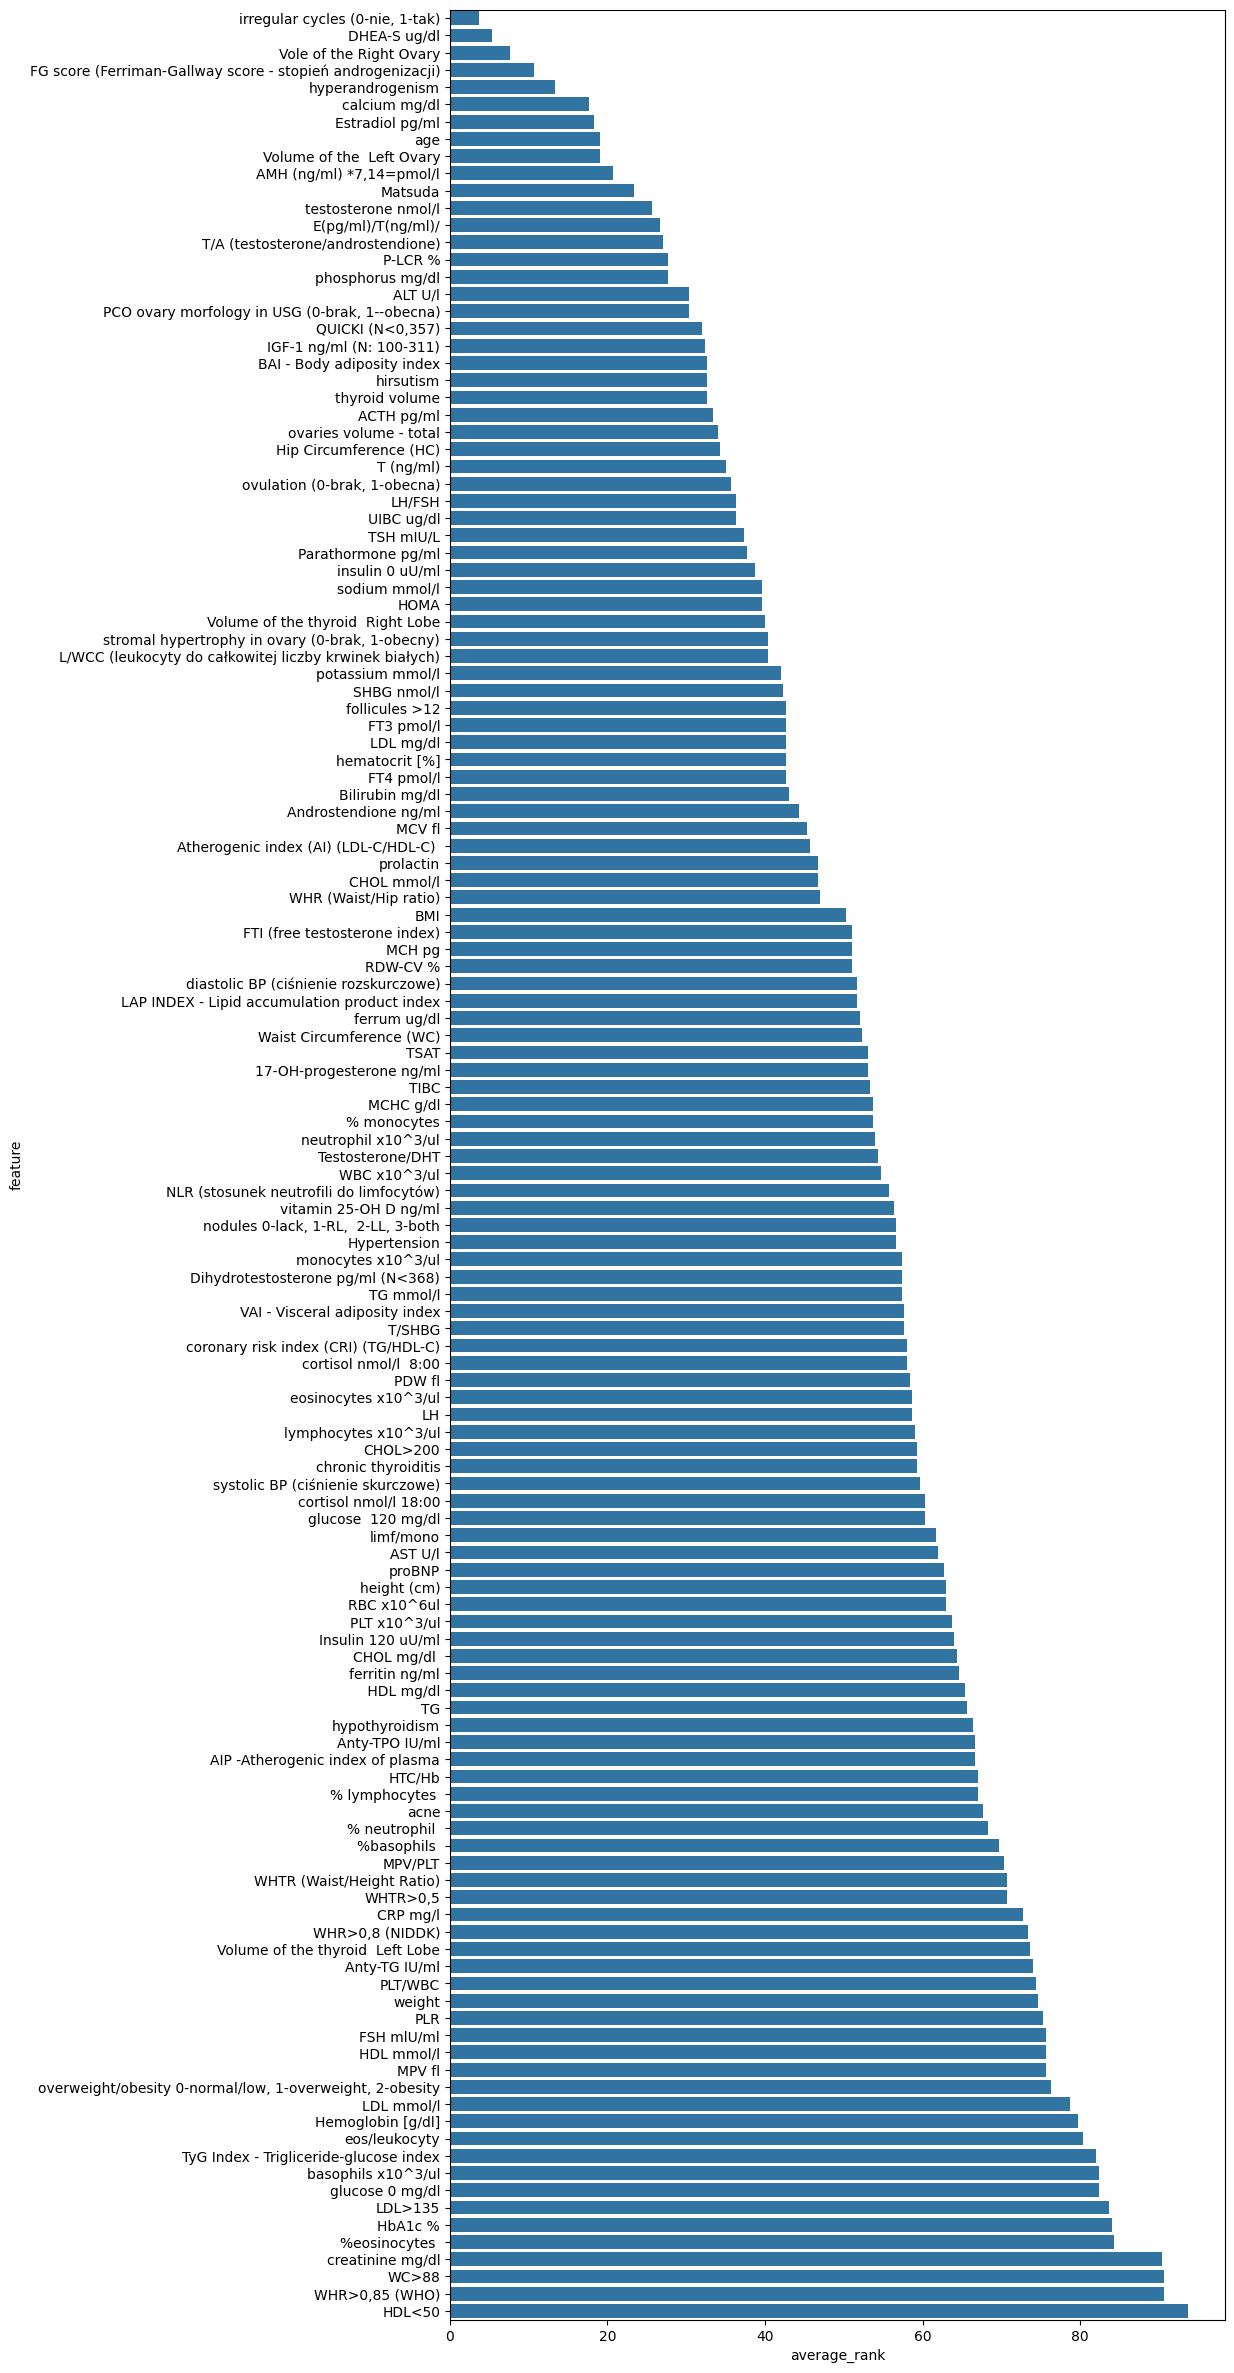

In [13]:
rename_importnace_col(feature_importnces_lr, 'logistic regression')
rename_importnace_col(feature_importnces_tree, 'tree')
rename_importnace_col(feature_importnces_rf, 'random forest')

feature_importance_df = merge_feature_importances([feature_importnces_lr, feature_importnces_tree, feature_importnces_rf])
ranked_df = rank_importances(feature_importance_df)

ranked_df_sorted = ranked_df.sort_values(by='average_rank')


plt.figure(figsize=(10, 30))
sns.barplot(ranked_df_sorted, x="average_rank", y="feature")
plt.show()

In [14]:
overall_rank_top_features = ranked_df_sorted[ranked_df_sorted['average_rank'] < 40] # a cut found on the plot above
overall_rank_selected_features = list(overall_rank_top_features['feature'].values)

selected_features_map['average_rank'] = overall_rank_selected_features
print(f'Top {len(overall_rank_selected_features)} features:')
overall_rank_selected_features

Top 35 features:


['irregular cycles (0-nie, 1-tak)',
 'DHEA-S ug/dl',
 'Vole of the Right Ovary',
 'FG score (Ferriman-Gallway score - stopień androgenizacji)',
 'hyperandrogenism',
 'calcium mg/dl',
 'Estradiol pg/ml',
 'age',
 'Volume of the  Left Ovary',
 'AMH (ng/ml) *7,14=pmol/l',
 'Matsuda',
 'testosterone nmol/l',
 'E(pg/ml)/T(ng/ml)/',
 'T/A (testosterone/androstendione)',
 'P-LCR %',
 'phosphorus mg/dl',
 'ALT U/l',
 'PCO ovary morfology in USG (0-brak, 1--obecna)',
 'QUICKI (N<0,357)',
 'IGF-1 ng/ml (N: 100-311)',
 'BAI - Body adiposity index',
 'hirsutism',
 'thyroid volume',
 'ACTH pg/ml',
 'ovaries volume - total',
 'Hip Circumference (HC)',
 'T (ng/ml)',
 'ovulation (0-brak, 1-obecna)',
 'LH/FSH',
 'UIBC ug/dl',
 'TSH mIU/L',
 'Parathormone pg/ml',
 'insulin 0 uU/ml',
 'sodium mmol/l',
 'HOMA']

## Feature selection

### Chi 2

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


Selected 19 features


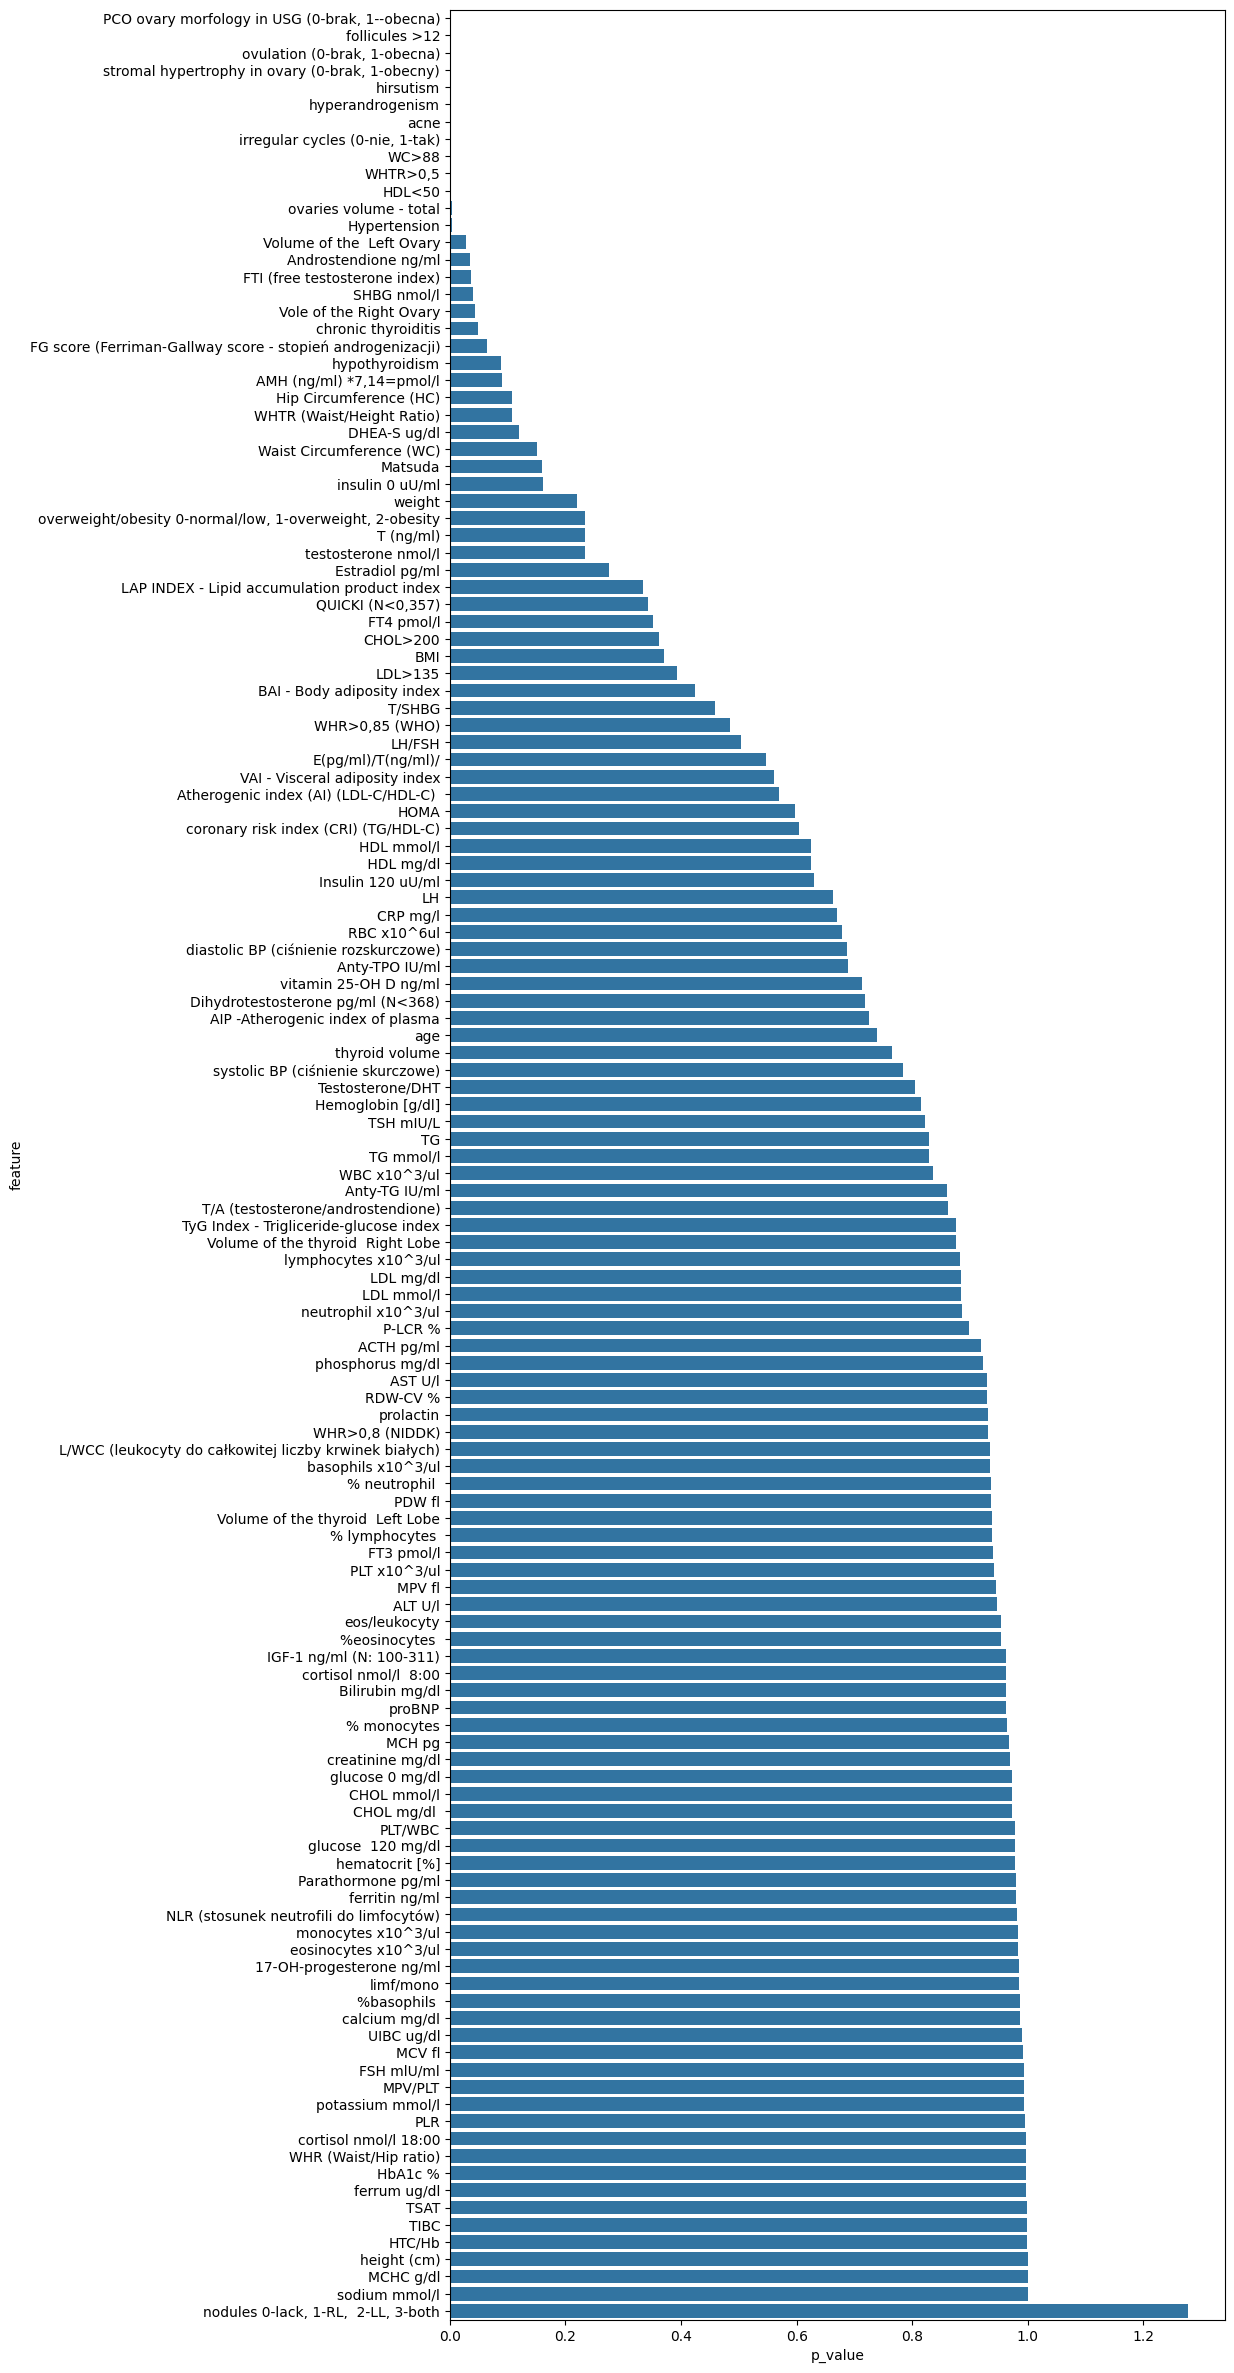

['PCO ovary morfology in USG (0-brak, 1--obecna)',
 'follicules >12',
 'ovulation (0-brak, 1-obecna)',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'hirsutism',
 'hyperandrogenism',
 'acne',
 'irregular cycles (0-nie, 1-tak)',
 'WC>88',
 'WHTR>0,5',
 'HDL<50',
 'ovaries volume - total',
 'Hypertension',
 'Volume of the  Left Ovary',
 'Androstendione ng/ml',
 'FTI (free testosterone index)',
 'SHBG nmol/l',
 'Vole of the Right Ovary',
 'chronic thyroiditis']

In [16]:
selected_features_chi2 = feature_selection_chi2(SelectKBest(chi2, k=15), PCO, continuous_preprocessor, categorical_preprocessor, X_train, y_train)
selected_features_map['chi_2'] = selected_features_chi2
selected_features_chi2

### Mutual info

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


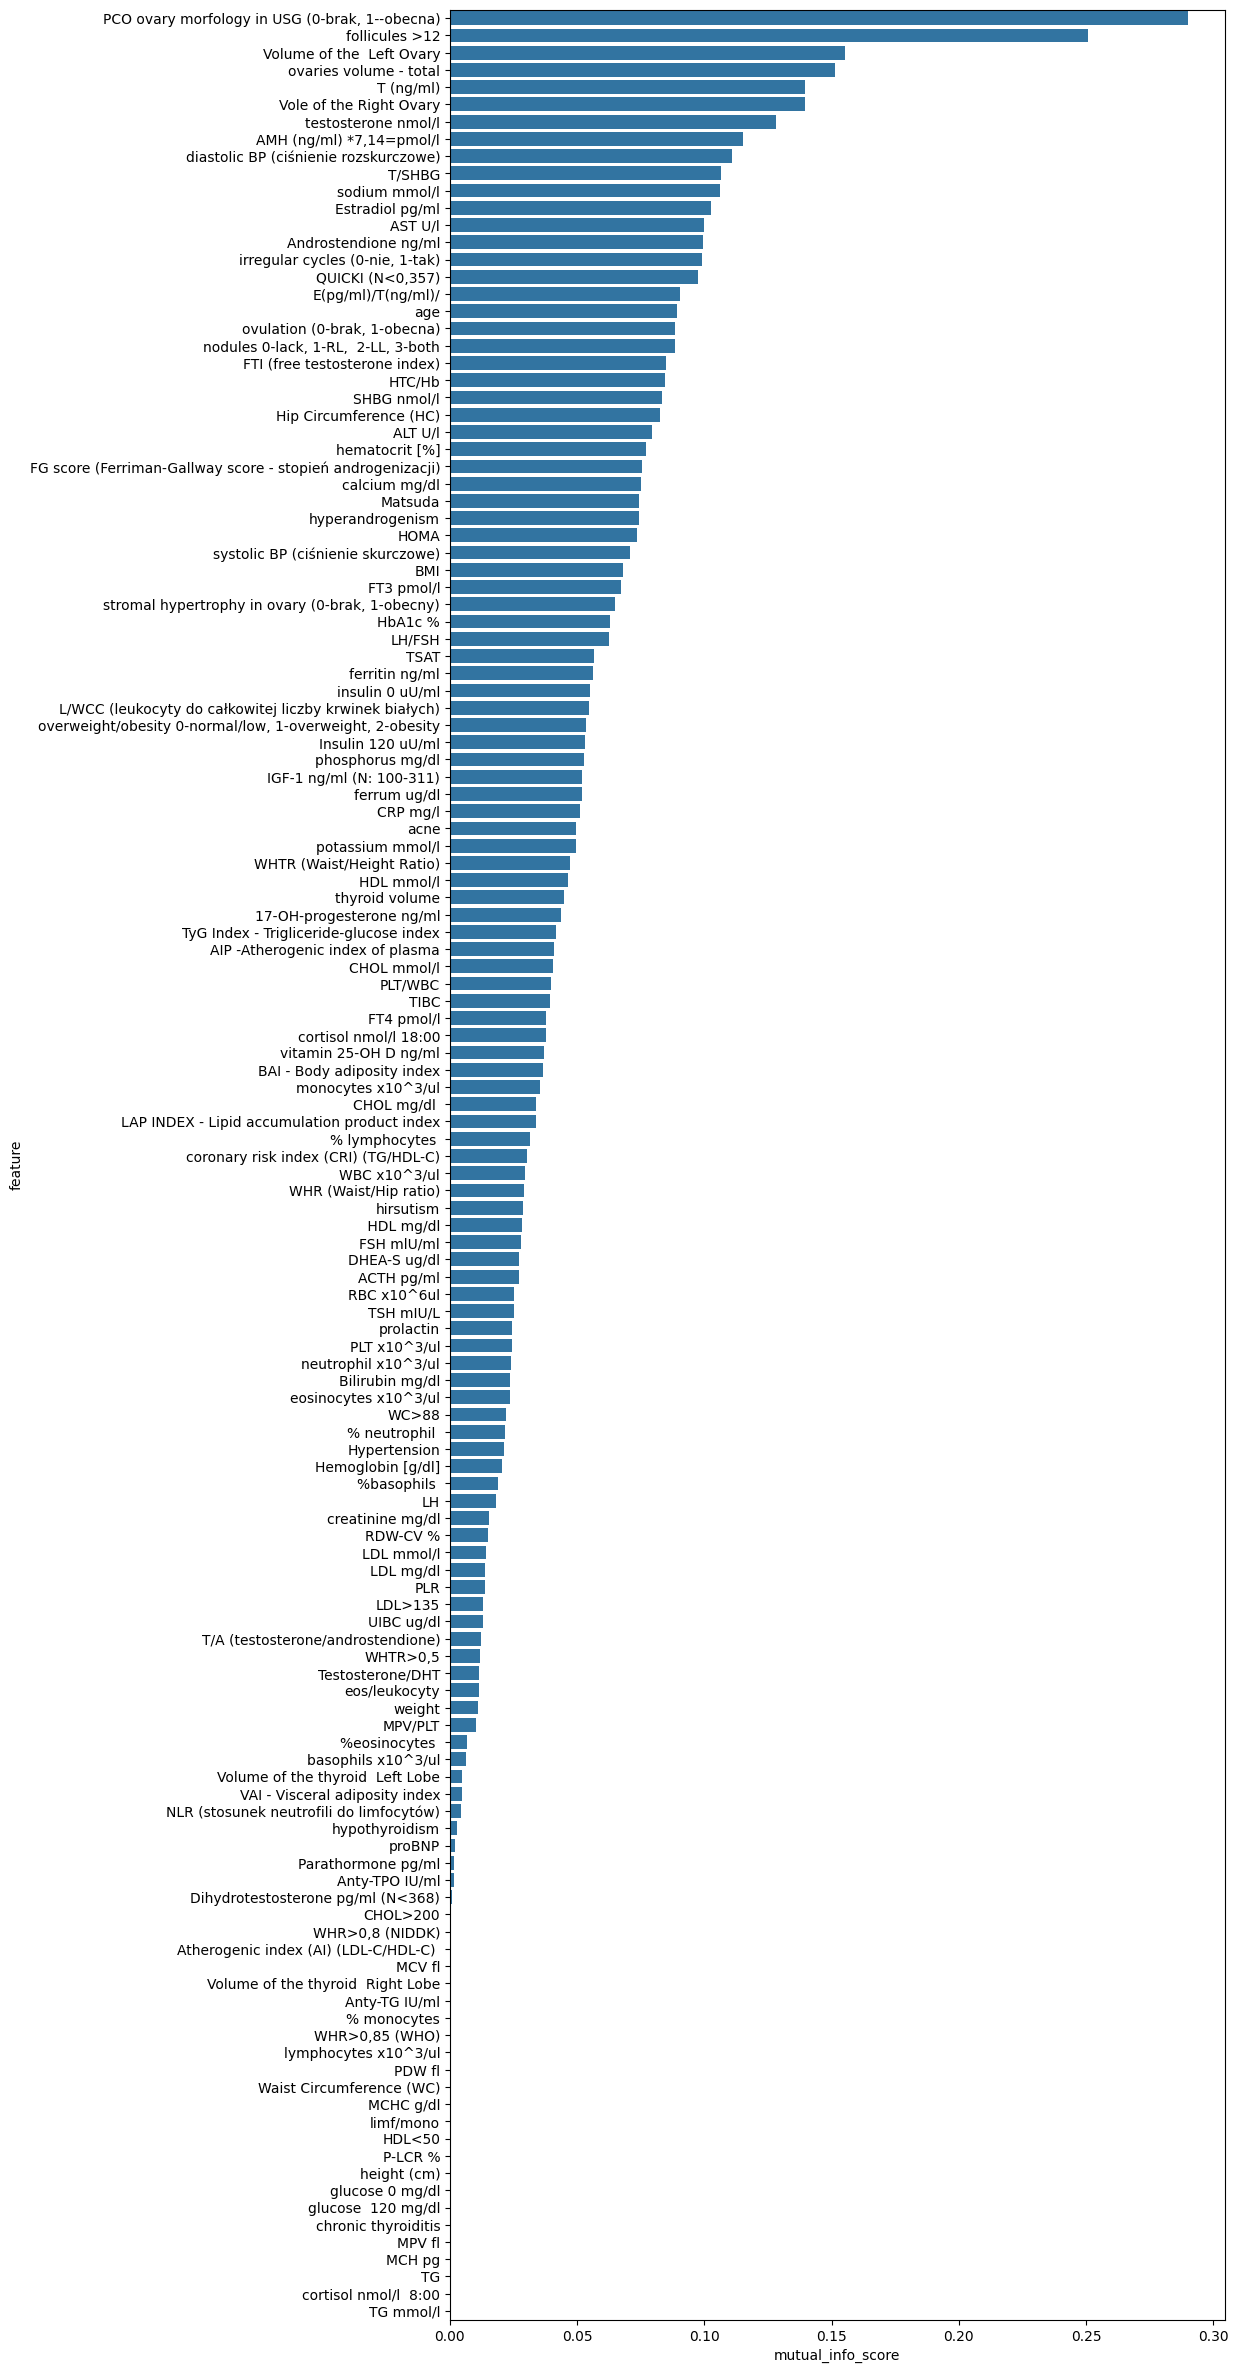

Selected 102 features


In [18]:
selected_feature_names_mutual_info = feature_selection_mutual_info_classification(X_train, y_train, PCO, continuous_preprocessor, categorical_preprocessor)
selected_feature_names_mutual_info = selected_feature_names_mutual_info[selected_feature_names_mutual_info['mutual_info_score'] > 0.005]

selected_feature_names_mutual_info.reset_index(drop=True, inplace=True)
print(f'Selected {len(selected_feature_names_mutual_info)} features')
selected_features_map['mutual_info'] = list(selected_feature_names_mutual_info['feature'].values)
# selected_feature_names_mutual_info

### Recursive Feature elimination

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


Optimal number of features: 50


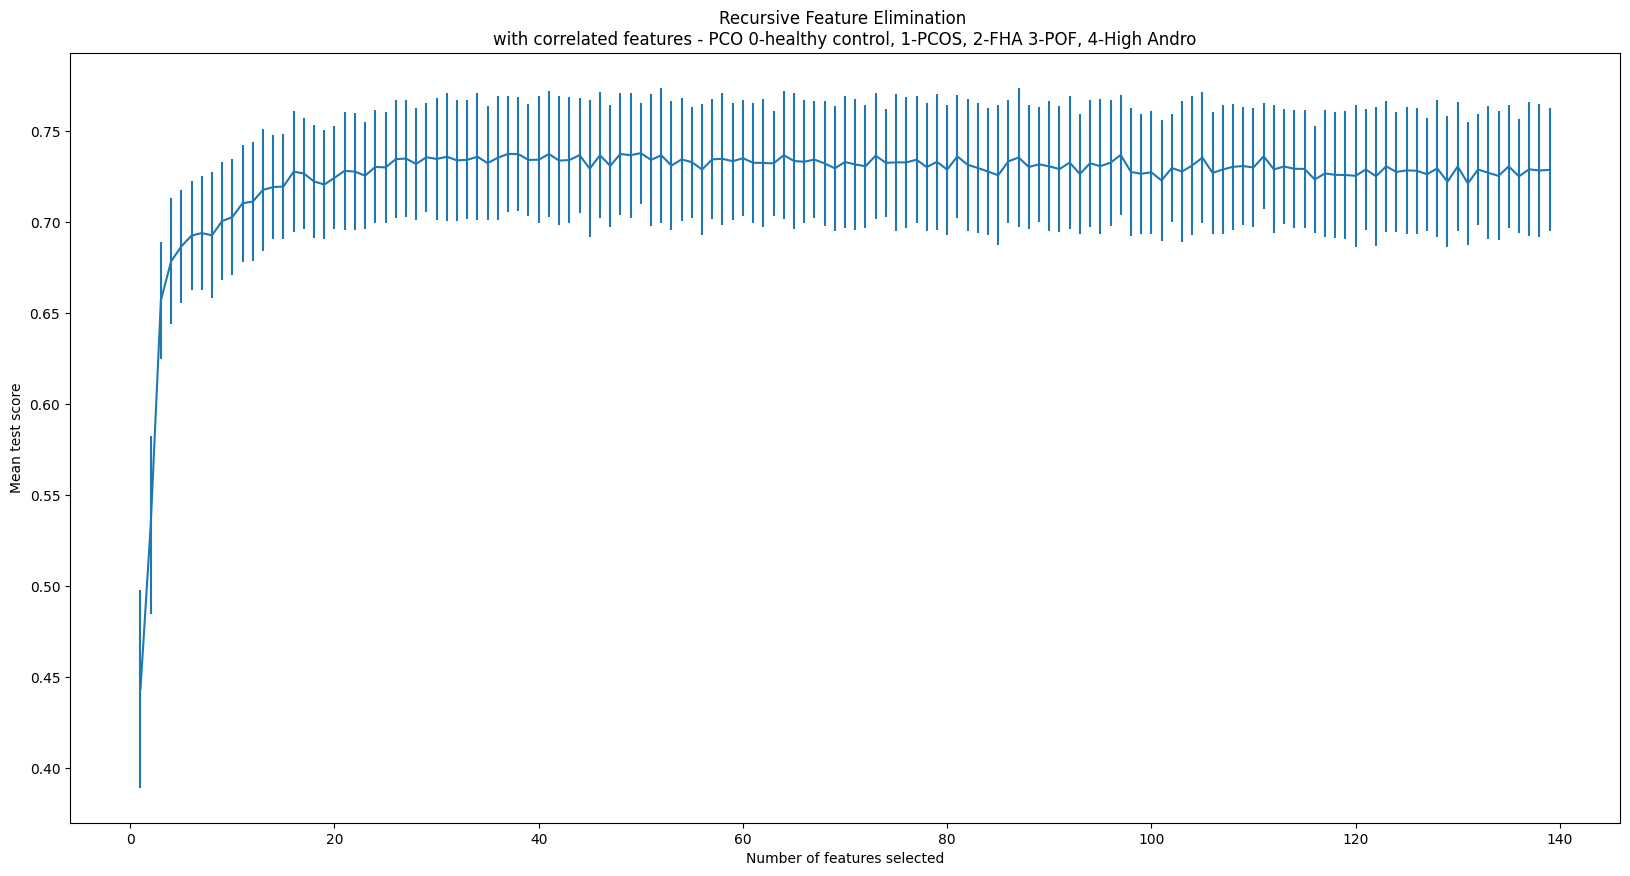

['SHBG nmol/l',
 'monocytes x10^3/ul',
 'HOMA',
 'irregular cycles (0-nie, 1-tak)',
 'insulin 0 uU/ml',
 'hyperandrogenism',
 'IGF-1 ng/ml (N: 100-311)',
 'follicules >12',
 'LDL mg/dl',
 'LH',
 'LH/FSH',
 'diastolic BP (ciśnienie rozskurczowe)',
 'cortisol nmol/l 18:00',
 'MCV fl',
 'calcium mg/dl',
 'Matsuda',
 'PCO ovary morfology in USG (0-brak, 1--obecna)',
 'QUICKI (N<0,357)',
 'Volume of the thyroid  Right Lobe',
 'vitamin 25-OH D ng/ml',
 'T (ng/ml)',
 'T/A (testosterone/androstendione)',
 'T/SHBG',
 'Volume of the  Left Ovary',
 'Vole of the Right Ovary',
 'TSAT',
 'TSH mIU/L',
 'Testosterone/DHT',
 'FTI (free testosterone index)',
 'FT4 pmol/l',
 'VAI - Visceral adiposity index',
 'proBNP',
 'FT3 pmol/l',
 'ALT U/l',
 'BAI - Body adiposity index',
 'sodium mmol/l',
 'Bilirubin mg/dl',
 'phosphorus mg/dl',
 'AMH (ng/ml) *7,14=pmol/l',
 'prolactin',
 'ovaries volume - total',
 'systolic BP (ciśnienie skurczowe)',
 'thyroid volume',
 'DHEA-S ug/dl',
 'Dihydrotestosterone pg/ml (

In [19]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

recursive_feature_elimination_ranked_features_lasso = recursive_feature_elimination(X_train, y_train, lasso_model, PCO, continuous_preprocessor, categorical_preprocessor, scoring_metric='f1_weighted')
selected_features_map['recursive_feature_elimination'] = list(recursive_feature_elimination_ranked_features_lasso[recursive_feature_elimination_ranked_features_lasso['ranking'] == 1]['feature'].values)
selected_features_map['recursive_feature_elimination']

### Gini index

In [20]:
threshold = 0.5
gini_index_selected_features = feature_selection_gini_index(PCO, continuous_preprocessor, categorical_preprocessor, X_train, y_train, threshold=threshold)

#  NOTE: we don't consider it as a constraint because it would select either one feature or all of them
# selected_features_map['permutation_importance'] = gini_index_selected_features
gini_index_selected_features

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


,features,gini_index
124,"PCO ovary morfology in USG (0-brak, 1--obecna)_1.0",0.472646
0,IGF-1 ng/ml (N: 100-311),0.500000
88,Anty-TPO IU/ml,0.500000
89,Anty-TG IU/ml,0.500000
90,FSH mlU/ml,0.500000


### Permutation importance

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


selected 134 features


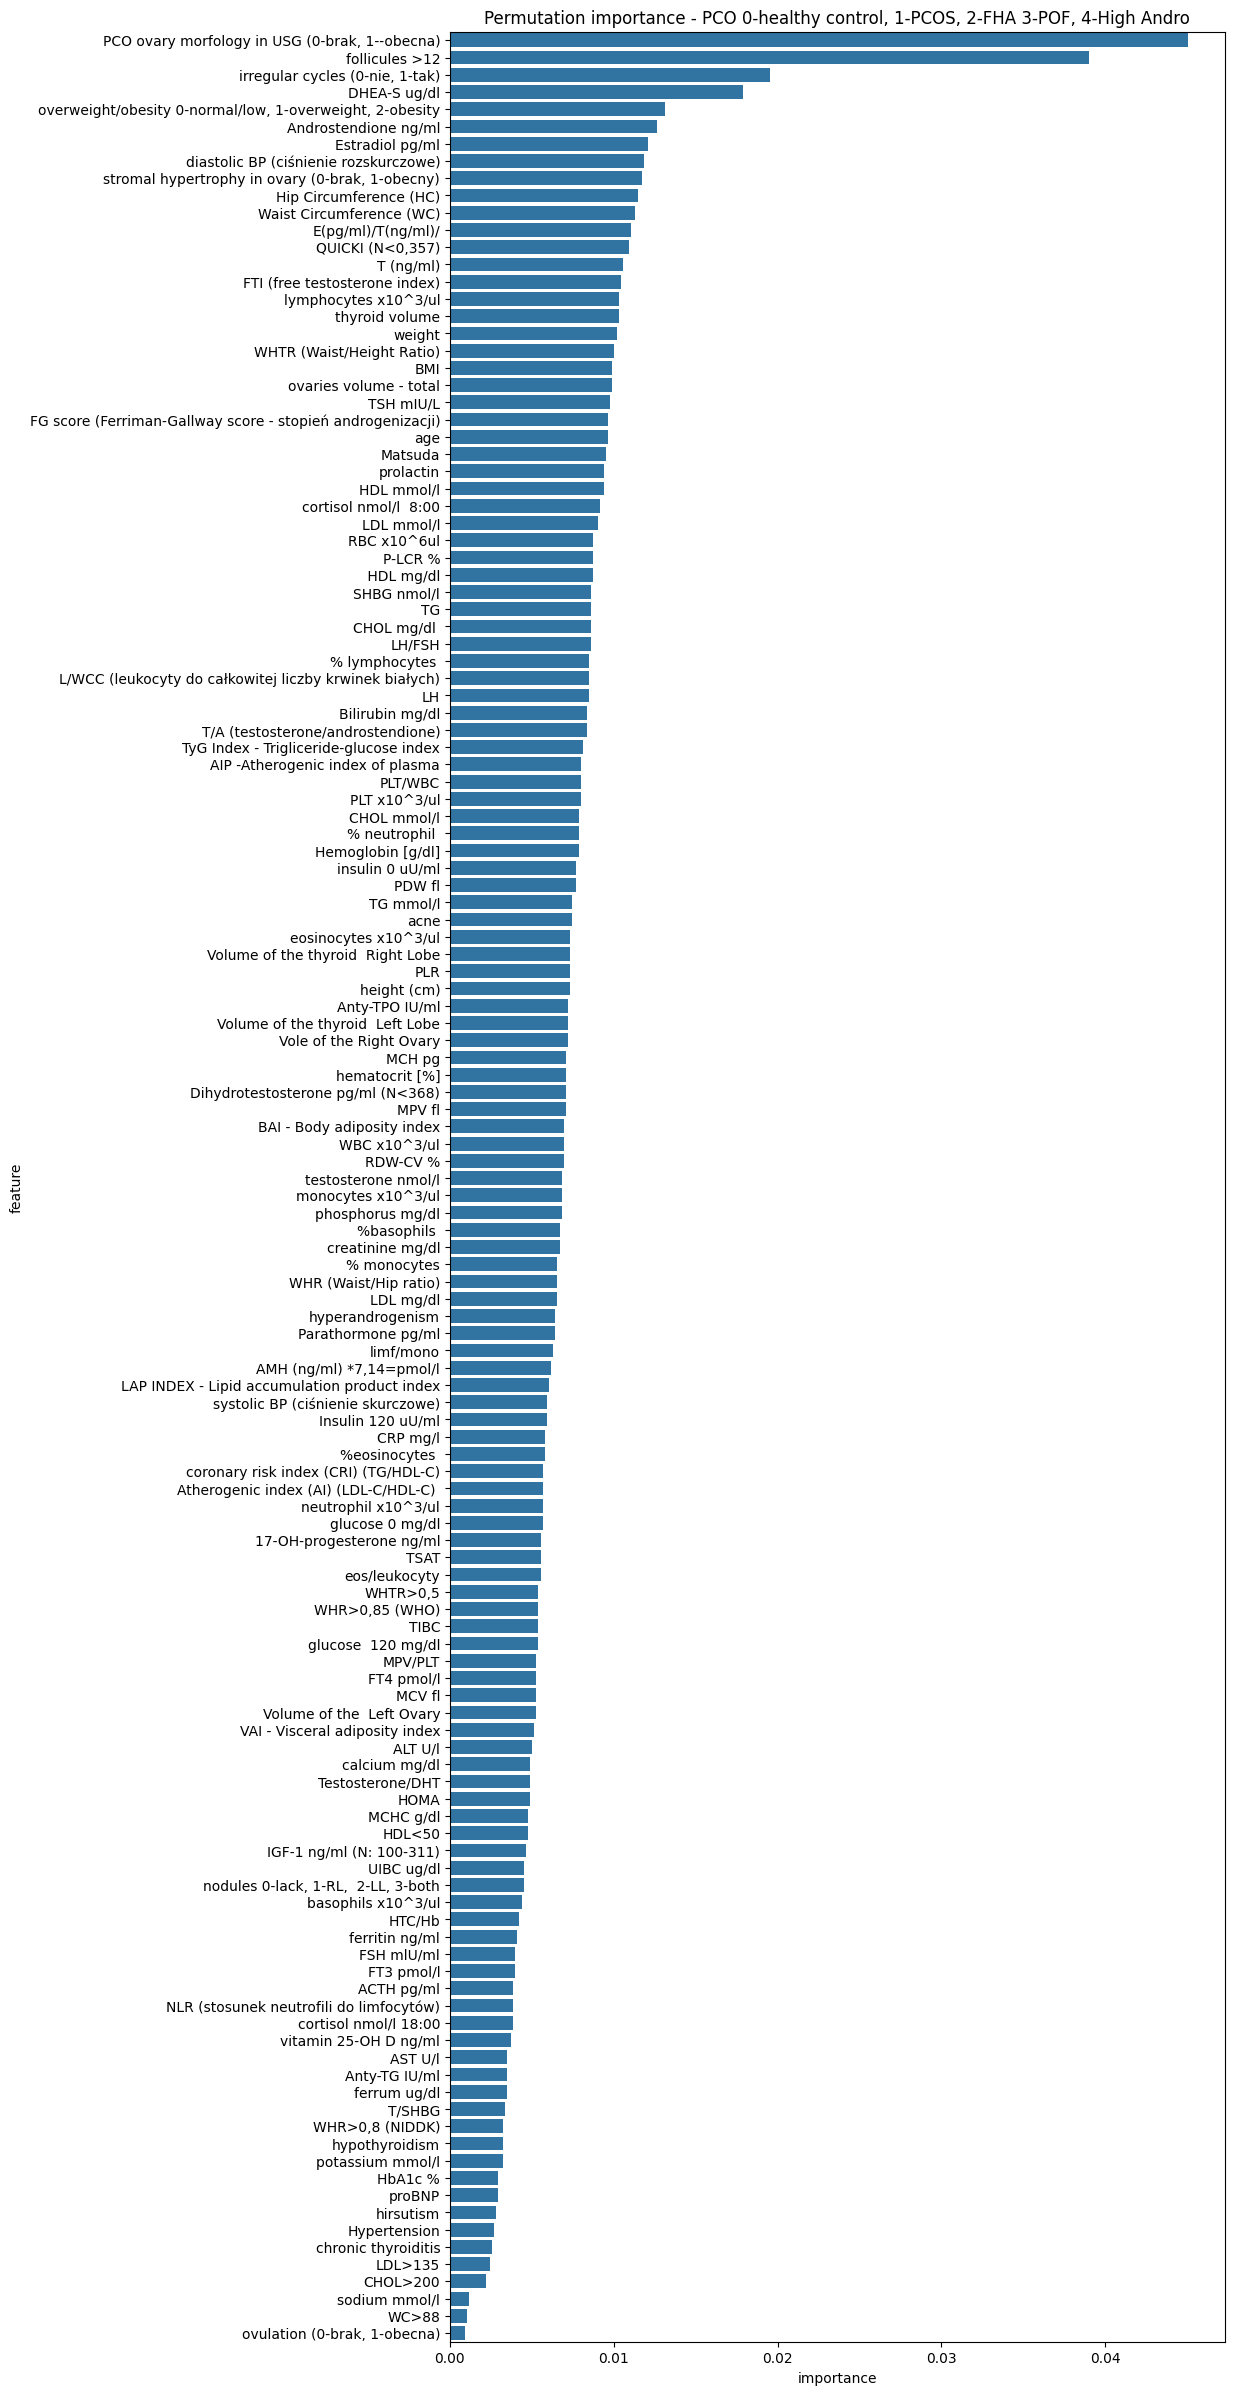

Actually selected 100 features


In [21]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

selected_features_permutation_importance = get_permutation_importance(X_train, y_train, lasso_model, continuous_preprocessor, categorical_preprocessor, PCO)
selected_features_permutation_importance = selected_features_permutation_importance[selected_features_permutation_importance['importance'] > 0.005]
selected_features_map['permutation_importance'] = list(selected_features_permutation_importance['feature'].values)
print(f'Actually selected {len(selected_features_map['permutation_importance'])} features')
# selected_features_permutation_importance

In [22]:
intersection_all_sets = set(selected_features_map[next(iter(selected_features_map))])

for key, items in selected_features_map.items():
    intersection_all_sets.intersection_update(items)


intersection_all_sets = list(intersection_all_sets)
print(len(intersection_all_sets))
print(intersection_all_sets)

pd.DataFrame(intersection_all_sets)

6
['Vole of the Right Ovary', 'irregular cycles (0-nie, 1-tak)', 'ovaries volume - total', 'PCO ovary morfology in USG (0-brak, 1--obecna)', 'hyperandrogenism', 'Volume of the  Left Ovary']


,0
0,Vole of the Right Ovary
1,"irregular cycles (0-nie, 1-tak)"
2,ovaries volume - total
3,"PCO ovary morfology in USG (0-brak, 1--obecna)"
4,hyperandrogenism
5,Volume of the Left Ovary


In [23]:
union_all_sets = set(selected_features_map[next(iter(selected_features_map))]) 

for key, items in selected_features_map.items():
    union_all_sets.update(items)
    

union_all_sets = list(union_all_sets)
print(len(union_all_sets))
print(union_all_sets)

128
['HbA1c %', 'Parathormone pg/ml', 'HOMA', 'basophils x10^3/ul', 'height (cm)', 'WHR>0,85 (WHO)', 'thyroid volume', 'ovaries volume - total', 'lymphocytes x10^3/ul', 'Volume of the  Left Ovary', 'T/A (testosterone/androstendione)', 'AMH (ng/ml) *7,14=pmol/l', 'cortisol nmol/l 18:00', 'Volume of the thyroid  Right Lobe', 'BAI - Body adiposity index', 'MCV fl', 'glucose  120 mg/dl', 'TG mmol/l', 'CRP mg/l', 'insulin 0 uU/ml', 'WBC x10^3/ul', 'WHR (Waist/Hip ratio)', 'BMI', 'FT4 pmol/l', '%basophils ', 'monocytes x10^3/ul', 'CHOL mg/dl ', 'testosterone nmol/l', 'PDW fl', 'Testosterone/DHT', 'FT3 pmol/l', 'HTC/Hb', 'LDL mg/dl', 'ACTH pg/ml', 'Dihydrotestosterone pg/ml (N<368)', 'FSH mlU/ml', 'stromal hypertrophy in ovary (0-brak, 1-obecny)', '% monocytes', 'Insulin 120 uU/ml', 'DHEA-S ug/dl', 'SHBG nmol/l', 'PLR', '% neutrophil ', 'Vole of the Right Ovary', 'T/SHBG', 'Matsuda', 'TyG Index - Trigliceride-glucose index', 'glucose 0 mg/dl', 'hirsutism', 'LH/FSH', 'coronary risk index (CRI)